In [64]:
#Importing packages we will use for this exercise
import pandas as pd #For visualizing data/"dataframes"
import numpy as np #Mathematical operations
import matplotlib.pyplot as plt #For making figures etc
#Import scikit learn's regression tool
from sklearn import linear_model
#Import scikit learn's r^2 calculator
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


#Load in data set and view data
#Let me see all the columns
pd.set_option('display.max_columns', None)
#Load in data set
ABBdata = pd.read_csv(r'C:\Users\matth\Downloads\Daily_data(cleaned).csv')

price=ABBdata['aeco_5a_cad/gj']


#Lets fit our model 
#Run a regression 
regr = linear_model.LinearRegression(fit_intercept=True)






features = ABBdata[['henry_usd/mmbtu','electricity_daily_average',
             'electricity_daily_on_peak_average', 'electricity_daily_off_peak_average',
             'electricity_30ravg_average', 'electricity_30ravg_on_peak_average',
             'electricity_30ravg__off_peak_average',
             'measured_receipts_volume_(103m3)', 'ngtl_storage_receipts_volume_(103m3)',
             'ngtl_gordondale_receipts_volume_(103m3)',
             'ngtl_groundbirch_east_receipts_volume_(103m3)',
             'ngtl_intra_provincial_deliveries_volume_(103m3)',
             'ngtl_border_deliveries_volume_(103m3)',
             'ngtl_empress_deliveries_volume_(103m3)',
             'ngtl_abc_deliveries_volume_(103m3)', 'ngtl_mcneil_deliveries_volume_(103m3)',
             'ngtl_gordondale_deliveries_volume_(103m3)', 'ngtl_storage_deliveries_volume_(103m3)']]
     


    
    
    
print(ABBdata)
    
    

    
    
#Run a regression 
regr = linear_model.LinearRegression(fit_intercept=True)


regr.fit(features, price)


#Display coefficients
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('R-squared:', regr.score(features,price))



            date  henry_usd/mmbtu  aeco_5a_usd/mmbtu  aeco_5a_cad/gj  \
0     2018-01-01            3.580             2.8248          3.3518   
1     2018-01-02            3.580             1.7509          2.0754   
2     2018-01-03            6.625             1.5555          1.8480   
3     2018-01-04            6.875             1.5478          1.8377   
4     2018-01-05            4.420             1.3134          1.5431   
...          ...              ...                ...             ...   
2155  2023-11-26            2.715             1.9322          2.5153   
2156  2023-11-27            2.715             1.8144          2.3449   
2157  2023-11-28            2.735             1.9060          2.4505   
2158  2023-11-29            2.785             1.8903          2.4360   
2159  2023-11-30            2.700             1.8949          2.4403   

      electricity_daily_average  electricity_daily_on_peak_average  \
0                         37.12                              35.5

328803707.5049619
                                           features           VIF
0                                   henry_usd/mmbtu  8.588911e+00
1                         electricity_daily_average  4.417838e+06
2                 electricity_daily_on_peak_average  3.054927e+06
3                electricity_daily_off_peak_average  1.841692e+05
4                        electricity_30ravg_average  8.980868e+07
5                electricity_30ravg_on_peak_average  5.702213e+07
6              electricity_30ravg__off_peak_average  4.062510e+06
7                  measured_receipts_volume_(103m3)  3.915420e+03
8              ngtl_storage_receipts_volume_(103m3)  3.588360e+00
9           ngtl_gordondale_receipts_volume_(103m3)  4.305644e+00
10    ngtl_groundbirch_east_receipts_volume_(103m3)  9.085669e+00
11  ngtl_intra_provincial_deliveries_volume_(103m3)  1.015573e+03
12            ngtl_border_deliveries_volume_(103m3)  2.204484e+04
13           ngtl_empress_deliveries_volume_(103m3)  4.716

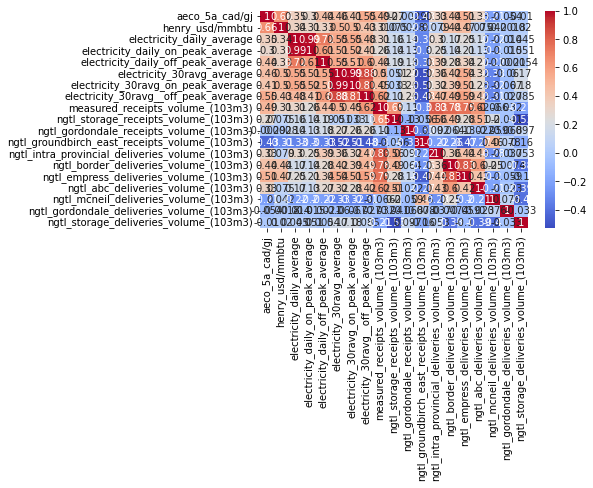

In [92]:
import seaborn as sns

features = ['henry_usd/mmbtu','electricity_daily_average',
             'electricity_daily_on_peak_average', 'electricity_daily_off_peak_average',
             'electricity_30ravg_average', 'electricity_30ravg_on_peak_average',
             'electricity_30ravg__off_peak_average',
             'measured_receipts_volume_(103m3)', 'ngtl_storage_receipts_volume_(103m3)',
             'ngtl_gordondale_receipts_volume_(103m3)',
             'ngtl_groundbirch_east_receipts_volume_(103m3)',
             'ngtl_intra_provincial_deliveries_volume_(103m3)',
             'ngtl_border_deliveries_volume_(103m3)',
             'ngtl_empress_deliveries_volume_(103m3)',
             'ngtl_abc_deliveries_volume_(103m3)', 'ngtl_mcneil_deliveries_volume_(103m3)',
             'ngtl_gordondale_deliveries_volume_(103m3)', 'ngtl_storage_deliveries_volume_(103m3)']
     



target = 'aeco_5a_cad/gj'

data = ['aeco_5a_cad/gj', 'henry_usd/mmbtu','electricity_daily_average',
             'electricity_daily_on_peak_average', 'electricity_daily_off_peak_average',
             'electricity_30ravg_average', 'electricity_30ravg_on_peak_average',
             'electricity_30ravg__off_peak_average',
             'measured_receipts_volume_(103m3)', 'ngtl_storage_receipts_volume_(103m3)',
             'ngtl_gordondale_receipts_volume_(103m3)',
             'ngtl_groundbirch_east_receipts_volume_(103m3)',
             'ngtl_intra_provincial_deliveries_volume_(103m3)',
             'ngtl_border_deliveries_volume_(103m3)',
             'ngtl_empress_deliveries_volume_(103m3)',
             'ngtl_abc_deliveries_volume_(103m3)', 'ngtl_mcneil_deliveries_volume_(103m3)',
             'ngtl_gordondale_deliveries_volume_(103m3)', 'ngtl_storage_deliveries_volume_(103m3)']
     

#Ridge is often used to help with multicollinearity. Multicollinearity 
#occurs when two or more predictor variables in a regression model are 
#highly correlated, making it difficult to isolate the individual effects 
#of each variable on the response variable. 

#lets take a look at the correlation of the variables
correlation_matrix = ABBdata[data].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#It seems that ridge may in fact be something we should consider


#Lets look at another way to check for correlations
from numpy.linalg import cond

#Here we will calculate the condition number, which is the square root 
#of the ratio of the largest to smallest eigenvalue of the correlation matrix.
#A high condition number (typically >30) may indicate multicollinearity.
corr_matrix = ABBdata[data].corr()
condition_number = cond(corr_matrix)
print(condition_number)

#Our number is much greater than 30 so ridge again seems to be appropriate


#strong multicolinearity is present
#Lets remove some of the variables that cover
#very similar data, for example we have many
#electricity variables that all cover similar data


#Lets investigate that
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [66]:
#Ridge Regression



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  


#To find the optimal lambda I looped through a grid of possible values of lambda.
#I tried a bunch of different ranges for ridge and then I zoned in on
#a smaller subset of possible lambdas to get a better idea of the 
#true lambda (I started with a range of 0 to 60)
#Find optimal lambda looping through a grid of possible values of lambda
n_lambdas = 610
lambdas = np.linspace(0, 10, n_lambdas)

mses = [] #For storing MSES from each iteration 

coefs = np.zeros((n_lambdas, len(features)))


l=0

while l<=n_lambdas-1:
    my_ridge = linear_model.Ridge(alpha=lambdas[l], fit_intercept=True) 
    my_ridge.fit(ABBdata[features], ABBdata[target])
    scores = cross_val_score(my_ridge, ABBdata[features], ABBdata[target], cv=5,scoring='neg_mean_squared_error') 
    scores = -scores
    score = scores.mean() 
    mses.append(score)
    coefs[l,:] = (my_ridge.coef_)
    l=l+1












In [67]:
#Ridge MSE's
print(mses)

[3.780941358937303, 3.7609000185413892, 3.747716085598276, 3.7371691337748985, 3.7283234205636417, 3.7207500039577495, 3.7141803383080756, 3.7084239816633002, 3.703338093971233, 3.6988121836418726, 3.694759022846925, 3.691108681626665, 3.6878043883072316, 3.6847995523421986, 3.6820555742427032, 3.679540200343723, 3.6772262712737094, 3.67509075436688, 3.6731139896458793, 3.671279096308446, 3.6695714972156352, 3.667978541805881, 3.6664891967435267, 3.665093797207464, 3.663783840563821, 3.6625518179577243, 3.6613910726650536, 3.660295683370335, 3.659260365043039, 3.6582803865964153, 3.657351499309727, 3.656469877684066, 3.655632068059339, 3.654834944193111, 3.654075669936727, 3.653351665855986, 3.652660581445248, 3.6520002697650282, 3.651368766490248, 3.650764270398935, 3.650185127071512, 3.64962981433838, 3.6490969292047035, 3.6485851763250094, 3.648093358176703, 3.6476203657673816, 3.647165170780421, 3.646726818204722, 3.646304420198118, 3.6458971499018924, 3.645504236635039, 3.64512496

In [68]:
#Without even looking at the R squared value of the Ridge model I know ahead of time that for the same
#variables in the model, Ridge will have a lower R squared than linear regression because we have 
#introduced bias into the model through the L2 regularizer. 





#Ridge stats
#Here we show the opitmal lambda
optimal_lambda = lambdas[np.argmin(mses)]

print("The optimal lambda for the ridge model is: ", optimal_lambda ,"\n")

# Fit Ridge model with the optimal lambda
optimal_ridge = linear_model.Ridge(alpha=optimal_lambda, fit_intercept=True)
optimal_ridge.fit(ABBdata[features], price)

#Print coefficients
print("Intercept, coefficients, R squared for Ridge model with optimal lambda:")
print ('Coefficients:', optimal_ridge.coef_)
print ('Intercept:', optimal_ridge.intercept_)
print ('R-squared:', optimal_ridge.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_ridge.predict(ABBdata[features])
mse = mean_squared_error(price,predictions)
print('Mean Squared Error:', mse, "\n")


#Linear regression stats
#Print coefficients
print("Intercept, coefficients, R squared for linear regression model:")
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('R-squared:', regr.score(ABBdata[features],price),"\n")

# Calculate Mean Squared Error
predictions = regr.predict(ABBdata[features])
mse = mean_squared_error(price,predictions)
print('Mean Squared Error:', mse, "\n")

#So we have found that the optimal lambda value for the ridge model (below)

#Ridge is consistent if the sample size is large enough which is the case 
#in our example here and that ridge comes with the major benifit that it reduces variance as 
#multicollinearity is reduced in ridge. We also know that if lambda is sufficiently small then
#the MSE of ridge will be smaller than OLS, in our case the MSE's are almost identical



The optimal lambda for the ridge model is:  4.909688013136289 

Intercept, coefficients, R squared for Ridge model with optimal lambda:
Coefficients: [ 5.15049515e-01  3.54735469e-02 -2.32565691e-02 -1.02279228e-02
 -2.89544723e-01  1.84014161e-01  1.14535089e-01  2.31060298e-05
  1.48387440e-05 -6.67496406e-05 -4.66617752e-05 -2.80280562e-05
 -8.50914022e-05  6.87357656e-05  8.01489634e-05  3.76440218e-05
 -2.32660189e-04  1.51572610e-05]
Intercept: 0.9853461954321427
R-squared: 0.664436034472038 

Mean Squared Error: 0.8193590838111089 

Intercept, coefficients, R squared for linear regression model:
Coefficients: [ 5.07073911e-01  2.90912241e-01 -1.93577686e-01 -9.54493311e-02
 -8.08816492e+00  5.38333372e+00  2.71377495e+00  2.25409232e-05
  1.52287100e-05 -7.56032001e-05 -4.71993552e-05 -2.78176673e-05
 -8.57173055e-05  7.01604988e-05  7.94752399e-05  3.96205382e-05
 -2.23176280e-04  1.61040229e-05]
Intercept: 1.167948152649259
R-squared: 0.6677149185887641 

Mean Squared Error: 0

In [77]:
#LASSO Regression
#I tried using the non standardized data but could not get convergence







# Initialize a scaler
#scaler = StandardScaler()

# Fit and transform the data
#ABBdata[features] = scaler.fit_transform(ABBdata[features])    
    





#I tried a bunch of different ranges for LASSO and then I zoned in on
#a smaller subset of possible lambdas to get a better idea of the 
#true lambda (I started with a range of 0 to 60)
#Find optimal lambda looping through a grid of possible values of lambda
n_lambdas_lasso = 610
lambdas_lasso = np.linspace(20, 50, n_lambdas_lasso)
mses_lasso = [] #For storing MSES from each iteration


coefs_lasso = np.zeros((n_lambdas_lasso, len(features)))


l=0
while l<=n_lambdas_lasso-1:
    my_lasso = linear_model.Lasso(alpha=lambdas_lasso[l], fit_intercept=True, max_iter=1000)
    my_lasso.fit(ABBdata[features], price)
    scores_lasso = cross_val_score(my_lasso, ABBdata[features], price, cv=5,scoring='neg_mean_squared_error')
    scores_lasso = -scores_lasso
    score_lasso = scores_lasso.mean()
    mses_lasso.append(score_lasso)
    coefs_lasso[l,:] = (my_lasso.coef_)
    l=l+1
    print(l)
print(mses_lasso)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [78]:

#LASSO stats
#Here we show the opitmal lambda
optimal_lambda_lasso = lambdas_lasso[np.argmin(mses_lasso)]

print("The optimal lambda for the LASSO model is: ", optimal_lambda_lasso ,"\n")

# Fit LASSO model with the optimal lambda
optimal_lasso = linear_model.Lasso(alpha=optimal_lambda_lasso, fit_intercept=True)
optimal_lasso.fit(ABBdata[features], price)





#Print LASSO coefficients
print("Intercept, coefficients, R squared for LASSO model with optimal lambda:")
print ('Coefficients:', optimal_lasso.coef_)
print ('Intercept:', optimal_lasso.intercept_)
print ('R-squared:', optimal_lasso.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_lasso.predict(ABBdata[features])
mse_LASSO = mean_squared_error(price,predictions)
print('Mean Squared Error for LASSO:', mse_LASSO, "\n")






#Print Ridge coefficients
print("Intercept, coefficients, R squared for Ridge model with optimal lambda:")
print ('Coefficients:', optimal_ridge.coef_)
print ('Intercept:', optimal_ridge.intercept_)
print ('R-squared:', optimal_ridge.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_ridge.predict(ABBdata[features])
mse_ridge = mean_squared_error(price,predictions)
print('Mean Squared Error for Ridge:', mse_ridge, "\n")


#Linear regression stats
#Print coefficients
print("Intercept, coefficients, R squared for linear regression model:")
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('R-squared:', regr.score(ABBdata[features],price),"\n")

# Calculate Mean Squared Error
predictions = regr.predict(ABBdata[features])
mse_OLS = mean_squared_error(price,predictions)
print('Mean Squared Error for OLS:', mse_OLS, "\n")



#Looking at the lambda value for LASSO we see that we get a value of 0.0
#to get this number I first looked over a wide range of values (0 to 60)
#and then after looking at the mse values, I slowly lowered the range
#that lambda could be until I get to a very narrow range. Since the 
#optimal lambda value is 0.0 this implies the LASSO model is the same
#as OLS which is confirmed by the all of the values in the print 
#statements equaling the same numbers (with very slight differences
#in the 5th decimal place or past the 5th decimal place)

#As the optimal lambda was to set lambda equal to 0, no coefficients 
#were set to 0

#With the LASSO results our model comparison does not really change from the last part
#as LASSO says it is the same as OLS
#Overall it appears in this case that LASSO, OLS, and ridge perform very similarily, the R squared 
#in OLS and LASSO is only very slightly larger, while the MSE in OLS and LASSO is only very slightly 
#smaller, thus
#I would give the edge to OLS and LASSO but in general Ridge tends to be better for prediction than 
#OLS in general, as well, the variance of ridge is larger, but ridge's MSE tends to be smaller than 
#OLS (and LASSO in this case) for a sufficiently large lamda value

The optimal lambda for the LASSO model is:  50.0 

Intercept, coefficients, R squared for LASSO model with optimal lambda:
Coefficients: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.05019818e-05
  6.74915302e-06 -1.17482943e-04 -8.09583616e-05 -3.52570481e-05
 -0.00000000e+00 -0.00000000e+00 -2.02417238e-05 -2.92217505e-05
 -0.00000000e+00  1.09295488e-05]
Intercept: -3.5275244006017403
R-squared: 0.3951918707821086 

Mean Squared Error for LASSO: 1.4767826272937177 

Intercept, coefficients, R squared for Ridge model with optimal lambda:
Coefficients: [ 5.15049515e-01  3.54735469e-02 -2.32565691e-02 -1.02279228e-02
 -2.89544723e-01  1.84014161e-01  1.14535089e-01  2.31060298e-05
  1.48387440e-05 -6.67496406e-05 -4.66617752e-05 -2.80280562e-05
 -8.50914022e-05  6.87357656e-05  8.01489634e-05  3.76440218e-05
 -2.32660189e-04  1.51572610e-05]
Intercept: 0.9853461954321427
R-squared: 0.664436034472038 

Mean Squared E

In [46]:
#Regression Trees

#Note: Regression trees do not give coefficients
#which is a disadvantage of the model.



import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


# Define features and target variable


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(ABBdata[features], ABBdata[target], test_size=0.2, random_state=42)

# Initialize variables for optimal depth and minimum MSE
optimal_depth = None
min_mse = float('inf')

# Loop through a range of possible tree depths
for depth in range(1, 50):  
    reg_tree = DecisionTreeRegressor(max_depth=depth)
    mse_scores = -cross_val_score(reg_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_mse = mse_scores.mean()
    
    if avg_mse < min_mse:
        min_mse = avg_mse
        optimal_depth = depth

# Create and fit the regression tree model with the optimal depth
reg_tree = DecisionTreeRegressor(max_depth=optimal_depth)
reg_tree.fit(X_train, y_train)

# Make predictions
y_pred = reg_tree.predict(X_test)

# Evaluate the model
mse_RT = mean_squared_error(y_test, y_pred)



print(f"Optimal Tree Depth (alpha): {optimal_depth}")
#this is the tree depth that minimizes the MSE value for the 
#regression tree


print(f"Mean Squared Error for the regression tree: ", mse_RT)


#The below code works to show the tree in a graph,
#however, because it is deep and wide for a computer frame
#the visualization is hard to view, but I have included 
#the code below
# # Visualize the tree
# plt.figure(figsize=(10, 4))
# plot_tree(reg_tree, feature_names=features, filled=True)
# plt.show()



#Comparing MSE values
print(f"Mean Squared Error for the regression tree: ", mse_RT)
print('Mean Squared Error for LASSO :', mse_LASSO)
print('Mean Squared Error for ridge:', mse_ridge)
print('Mean Squared Error for OLS:', mse_OLS)


Optimal Tree Depth (alpha): 13
Mean Squared Error for the regression tree:  0.25192884460090764
Mean Squared Error for the regression tree:  0.25192884460090764
Mean Squared Error for LASSO : 0.4973553302731847
Mean Squared Error for ridge: 1.5407480388303314
Mean Squared Error for OLS: 1.7415714345734221


            date  henry_usd/mmbtu  aeco_5a_usd/mmbtu  aeco_5a_cad/gj  \
0     2018-01-01            3.580             2.8248          3.3518   
1     2018-01-02            3.580             1.7509          2.0754   
2     2018-01-03            6.625             1.5555          1.8480   
3     2018-01-04            6.875             1.5478          1.8377   
4     2018-01-05            4.420             1.3134          1.5431   
...          ...              ...                ...             ...   
2155  2023-11-26            2.715             1.9322          2.5153   
2156  2023-11-27            2.715             1.8144          2.3449   
2157  2023-11-28            2.735             1.9060          2.4505   
2158  2023-11-29            2.785             1.8903          2.4360   
2159  2023-11-30            2.700             1.8949          2.4403   

      electricity_daily_average  electricity_daily_on_peak_average  \
0                         37.12                              35.5

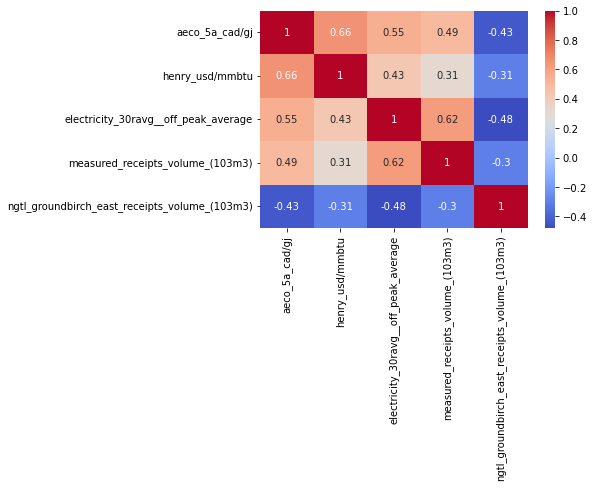

In [62]:
#Lets re-run all of the code but we will take out the variables
#that LASSO suggested

ABBdata = pd.read_csv(r'C:\Users\matth\Downloads\Daily_data(cleaned).csv')

price=ABBdata['aeco_5a_cad/gj']




features = ABBdata[['henry_usd/mmbtu',
             'electricity_30ravg__off_peak_average',
             'measured_receipts_volume_(103m3)', 
             'ngtl_groundbirch_east_receipts_volume_(103m3)']]
print(ABBdata)
#Lets fit our model 
#Run a regression 
regr = linear_model.LinearRegression(fit_intercept=True)



regr.fit(features, price)


#Display coefficients
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('R-squared:', regr.score(features,price))






target = 'aeco_5a_cad/gj'

data = ['aeco_5a_cad/gj','henry_usd/mmbtu',
             'electricity_30ravg__off_peak_average',
             'measured_receipts_volume_(103m3)', 
             'ngtl_groundbirch_east_receipts_volume_(103m3)']

#Ridge is often used to help with multicollinearity. Multicollinearity 
#occurs when two or more predictor variables in a regression model are 
#highly correlated, making it difficult to isolate the individual effects 
#of each variable on the response variable. 

#lets take a look at the correlation of the variables
correlation_matrix = ABBdata[data].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#It seems that ridge may in fact be something we should consider


#Lets look at another way to check for correlations
from numpy.linalg import cond

#Here we will calculate the condition number, which is the square root 
#of the ratio of the largest to smallest eigenvalue of the correlation matrix.
#A high condition number (typically >30) may indicate multicollinearity.
corr_matrix = ABBdata[data].corr()
condition_number = cond(corr_matrix)
print(condition_number)

#Our number is much greater than 30 so ridge again seems to be appropriate

In [54]:
#Ridge Regression



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  



features = ['henry_usd/mmbtu',
             'electricity_30ravg__off_peak_average',
             'measured_receipts_volume_(103m3)', 
             'ngtl_groundbirch_east_receipts_volume_(103m3)']



#To find the optimal lambda I looped through a grid of possible values of lambda.
#I tried a bunch of different ranges for ridge and then I zoned in on
#a smaller subset of possible lambdas to get a better idea of the 
#true lambda (I started with a range of 0 to 60)
#Find optimal lambda looping through a grid of possible values of lambda
n_lambdas = 610
lambdas = np.linspace(0, 1, n_lambdas)

mses = [] #For storing MSES from each iteration 

coefs = np.zeros((n_lambdas, len(features)))


l=0

while l<=n_lambdas-1:
    my_ridge = linear_model.Ridge(alpha=lambdas[l], fit_intercept=True) 
    my_ridge.fit(ABBdata[features], ABBdata[target])
    scores = cross_val_score(my_ridge, ABBdata[features], ABBdata[target], cv=5,scoring='neg_mean_squared_error') 
    scores = -scores
    score = scores.mean() 
    mses.append(score)
    coefs[l,:] = (my_ridge.coef_)
    l=l+1



In [55]:
#Ridge MSE's
print(mses)

[3.2643087753795066, 3.2643093635277283, 3.2643099516751293, 3.2643105398217087, 3.2643111279674693, 3.2643117161124082, 3.2643123042565323, 3.2643128923998304, 3.2643134805423104, 3.2643140686839702, 3.2643146568248085, 3.2643152449648256, 3.264315833104024, 3.2643164212424027, 3.2643170093799574, 3.2643175975167, 3.264318185652615, 3.2643187737877115, 3.264319361921989, 3.2643199500554445, 3.264320538188084, 3.264321126319897, 3.2643217144508925, 3.2643223025810677, 3.264322890710423, 3.264323478838956, 3.2643240669666724, 3.264324655093566, 3.2643252432196403, 3.264325831344896, 3.2643264194693273, 3.264327007592942, 3.2643275957157343, 3.2643281838377076, 3.264328771958857, 3.2643293600791905, 3.2643299481987036, 3.264330536317395, 3.264331124435267, 3.264331712552321, 3.264332300668548, 3.264332888783959, 3.2643334768985546, 3.2643340650123207, 3.26433465312527, 3.2643352412374, 3.2643358293487097, 3.2643364174592007, 3.2643370055688683, 3.264337593677719, 3.264338181785748, 3.264

In [56]:
#Without even looking at the R squared value of the Ridge model I know ahead of time that for the same
#variables in the model, Ridge will have a lower R squared than linear regression because we have 
#introduced bias into the model through the L2 regularizer. 





#Ridge stats
#Here we show the opitmal lambda
optimal_lambda = lambdas[np.argmin(mses)]

print("The optimal lambda for the ridge model is: ", optimal_lambda ,"\n")

# Fit Ridge model with the optimal lambda
optimal_ridge = linear_model.Ridge(alpha=optimal_lambda, fit_intercept=True)
optimal_ridge.fit(ABBdata[features], price)

#Print coefficients
print("Intercept, coefficients, R squared for Ridge model with optimal lambda:")
print ('Coefficients:', optimal_ridge.coef_)
print ('Intercept:', optimal_ridge.intercept_)
print ('R-squared:', optimal_ridge.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_ridge.predict(ABBdata[features])
mse = mean_squared_error(price,predictions)
print('Mean Squared Error:', mse, "\n")


#Linear regression stats
#Print coefficients
print("Intercept, coefficients, R squared for linear regression model:")
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('R-squared:', regr.score(ABBdata[features],price),"\n")

# Calculate Mean Squared Error
predictions = regr.predict(ABBdata[features])
mse = mean_squared_error(price,predictions)
print('Mean Squared Error:', mse, "\n")

#So we have found that the optimal lambda value for the ridge model (below)

#Ridge is consistent if the sample size is large enough which is the case 
#in our example here and that ridge comes with the major benifit that it reduces variance as 
#multicollinearity is reduced in ridge. We also know that if lambda is sufficiently small then
#the MSE of ridge will be smaller than OLS, in our case the MSE's are almost identical



The optimal lambda for the ridge model is:  0.0 

Intercept, coefficients, R squared for Ridge model with optimal lambda:
Coefficients: [ 4.28645364e-01  5.06619946e-03  1.13653711e-05 -5.05262589e-05]
Intercept: -2.9476847405336986
R-squared: 0.5669621607717878 

Mean Squared Error: 1.0573646864833113 

Intercept, coefficients, R squared for linear regression model:
Coefficients: [ 4.28645364e-01  5.06619946e-03  1.13653711e-05 -5.05262589e-05]
Intercept: -2.947684740533298
R-squared: 0.5669621607717878 

Mean Squared Error: 1.0573646864833113 



In [60]:
#LASSO Regression
######I tried using the non standardized data but could not get convergence







# Initialize a scaler
#scaler = StandardScaler()

# Fit and transform the data
#ABBdata[features] = scaler.fit_transform(ABBdata[features])    
    





#I tried a bunch of different ranges for LASSO and then I zoned in on
#a smaller subset of possible lambdas to get a better idea of the 
#true lambda (I started with a range of 0 to 60)
#Find optimal lambda looping through a grid of possible values of lambda
n_lambdas_lasso = 610
lambdas_lasso = np.linspace(1, 50, n_lambdas_lasso)
mses_lasso = [] #For storing MSES from each iteration


coefs_lasso = np.zeros((n_lambdas_lasso, len(features)))


l=0
while l<=n_lambdas_lasso-1:
    my_lasso = linear_model.Lasso(alpha=lambdas_lasso[l], fit_intercept=True)
    my_lasso.fit(ABBdata[features], price)
    scores_lasso = cross_val_score(my_lasso, ABBdata[features], price, cv=5,scoring='neg_mean_squared_error')
    scores_lasso = -scores_lasso
    score_lasso = scores_lasso.mean()
    mses_lasso.append(score_lasso)
    coefs_lasso[l,:] = (my_lasso.coef_)
    l=l+1
print(mses_lasso)

[3.9338035151993425, 3.9072376489885543, 3.882035881489121, 3.858198460325822, 3.835725848028902, 3.813337140253856, 3.794054487988621, 3.775986575729816, 3.7580320637566444, 3.740192948631787, 3.7224679971845887, 3.7048572094150485, 3.687360586539956, 3.6699785163569745, 3.6527120888145133, 3.6355584115395816, 3.6185191441177387, 3.601594038660049, 3.584783095166513, 3.568086313637136, 3.5515036940719127, 3.5350352364708444, 3.51868094083393, 3.5024408071611717, 3.4863148354525677, 3.4703030257081195, 3.4544053779278245, 3.438621892111685, 3.422952568259703, 3.4073974063718735, 3.3919564064482017, 3.3766295684886822, 3.361416892493318, 3.3463183784621107, 3.3313340263950564, 3.3164646115984935, 3.301708589249536, 3.2870667288853994, 3.2725390305060857, 3.2581254941115985, 3.2438261197019314, 3.2296409072770897, 3.2155698568370696, 3.201612581556348, 3.1877698678036004, 3.1740416880895586, 3.160426557105688, 3.1469263323921326, 3.13354026974664, 3.1202683691692075, 3.107110802566069, 3

In [61]:

#LASSO stats
#Here we show the opitmal lambda
optimal_lambda_lasso = lambdas_lasso[np.argmin(mses_lasso)]

print("The optimal lambda for the LASSO model is: ", optimal_lambda_lasso ,"\n")

# Fit LASSO model with the optimal lambda
optimal_lasso = linear_model.Lasso(alpha=optimal_lambda_lasso, fit_intercept=True)
optimal_lasso.fit(ABBdata[features], price)





#Print LASSO coefficients
print("Intercept, coefficients, R squared for LASSO model with optimal lambda:")
print ('Coefficients:', optimal_lasso.coef_)
print ('Intercept:', optimal_lasso.intercept_)
print ('R-squared:', optimal_lasso.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_lasso.predict(ABBdata[features])
mse_LASSO = mean_squared_error(price,predictions)
print('Mean Squared Error for LASSO:', mse_LASSO, "\n")






#Print Ridge coefficients
print("Intercept, coefficients, R squared for Ridge model with optimal lambda:")
print ('Coefficients:', optimal_ridge.coef_)
print ('Intercept:', optimal_ridge.intercept_)
print ('R-squared:', optimal_ridge.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_ridge.predict(ABBdata[features])
mse_ridge = mean_squared_error(price,predictions)
print('Mean Squared Error for Ridge:', mse_ridge, "\n")


#Linear regression stats
#Print coefficients
print("Intercept, coefficients, R squared for linear regression model:")
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('R-squared:', regr.score(ABBdata[features],price),"\n")

# Calculate Mean Squared Error
predictions = regr.predict(ABBdata[features])
mse_OLS = mean_squared_error(price,predictions)
print('Mean Squared Error for OLS:', mse_OLS, "\n")



#Looking at the lambda value for LASSO we see that we get a value of 0.0
#to get this number I first looked over a wide range of values (0 to 60)
#and then after looking at the mse values, I slowly lowered the range
#that lambda could be until I get to a very narrow range. Since the 
#optimal lambda value is 0.0 this implies the LASSO model is the same
#as OLS which is confirmed by the all of the values in the print 
#statements equaling the same numbers (with very slight differences
#in the 5th decimal place or past the 5th decimal place)

#As the optimal lambda was to set lambda equal to 0, no coefficients 
#were set to 0

#With the LASSO results our model comparison does not really change from the last part
#as LASSO says it is the same as OLS
#Overall it appears in this case that LASSO, OLS, and ridge perform very similarily, the R squared 
#in OLS and LASSO is only very slightly larger, while the MSE in OLS and LASSO is only very slightly 
#smaller, thus
#I would give the edge to OLS and LASSO but in general Ridge tends to be better for prediction than 
#OLS in general, as well, the variance of ridge is larger, but ridge's MSE tends to be smaller than 
#OLS (and LASSO in this case) for a sufficiently large lamda value

The optimal lambda for the LASSO model is:  13.229885057471265 

Intercept, coefficients, R squared for LASSO model with optimal lambda:
Coefficients: [ 0.00000000e+00  0.00000000e+00  2.06580730e-05 -9.85633817e-05]
Intercept: -4.319065391871918
R-squared: 0.3340976187909792 

Mean Squared Error for LASSO: 1.6259587471396537 

Intercept, coefficients, R squared for Ridge model with optimal lambda:
Coefficients: [ 4.28645364e-01  5.06619946e-03  1.13653711e-05 -5.05262589e-05]
Intercept: -2.9476847405336986
R-squared: 0.5669621607717878 

Mean Squared Error for Ridge: 1.0573646864833113 

Intercept, coefficients, R squared for linear regression model:
Coefficients: [ 4.28645364e-01  5.06619946e-03  1.13653711e-05 -5.05262589e-05]
Intercept: -2.947684740533298
R-squared: 0.5669621607717878 

Mean Squared Error for OLS: 1.0573646864833113 



In [59]:
#Regression Trees

#Note: Regression trees do not give coefficients
#which is a disadvantage of the model.



import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


# Define features and target variable


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(ABBdata[features], ABBdata[target], test_size=0.2, random_state=42)

# Initialize variables for optimal depth and minimum MSE
optimal_depth = None
min_mse = float('inf')

# Loop through a range of possible tree depths
for depth in range(1, 50):  
    reg_tree = DecisionTreeRegressor(max_depth=depth)
    mse_scores = -cross_val_score(reg_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_mse = mse_scores.mean()
    
    if avg_mse < min_mse:
        min_mse = avg_mse
        optimal_depth = depth

# Create and fit the regression tree model with the optimal depth
reg_tree = DecisionTreeRegressor(max_depth=optimal_depth)
reg_tree.fit(X_train, y_train)

# Make predictions
y_pred = reg_tree.predict(X_test)

# Evaluate the model
mse_RT = mean_squared_error(y_test, y_pred)



print(f"Optimal Tree Depth (alpha): {optimal_depth}")
#this is the tree depth that minimizes the MSE value for the 
#regression tree


print(f"Mean Squared Error for the regression tree: ", mse_RT)


#The below code works to show the tree in a graph,
#however, because it is deep and wide for a computer frame
#the visualization is hard to view, but I have included 
#the code below
# # Visualize the tree
# plt.figure(figsize=(10, 4))
# plot_tree(reg_tree, feature_names=features, filled=True)
# plt.show()



#Comparing MSE values
print(f"Mean Squared Error for the regression tree: ", mse_RT)
print('Mean Squared Error for LASSO :', mse_LASSO)
print('Mean Squared Error for ridge:', mse_ridge)
print('Mean Squared Error for OLS:', mse_OLS)


Optimal Tree Depth (alpha): 11
Mean Squared Error for the regression tree:  0.47214122620950794
Mean Squared Error for the regression tree:  0.47214122620950794
Mean Squared Error for LASSO : 1.6259588253067108
Mean Squared Error for ridge: 1.0573646864833113
Mean Squared Error for OLS: 1.0573646864833113


In [94]:
#Looking at the results so far, LASSO says to kick out all
#variables which does not make sense as these variables
#are useful. The issue is with multicolinearity, to help
#solve this lets look at the Variance Inflation Factor (VIF)
#Interpretation of VIF:
#A VIF value of 1 indicates that the predictor is not correlated 
#with other predictors.
#A VIF greater than 1 suggests collinearity (correlation) among 
#predictors.
#Higher VIF values indicate stronger collinearity, which can lead 
#to unstable coefficient estimates.

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["features"] = ABBdata[features].columns
vif["VIF"] = [variance_inflation_factor(ABBdata[features].values, i) for i in range(ABBdata[features].shape[1])]

print(vif)


#The next few blocks of code will check the VIF and delete those
#from the features, then we will run LASSO to test how the model 
#preforms and see if variables still need to be kicked out

                                           features           VIF
0                                   henry_usd/mmbtu  8.588911e+00
1                         electricity_daily_average  4.417838e+06
2                 electricity_daily_on_peak_average  3.054927e+06
3                electricity_daily_off_peak_average  1.841692e+05
4                        electricity_30ravg_average  8.980868e+07
5                electricity_30ravg_on_peak_average  5.702213e+07
6              electricity_30ravg__off_peak_average  4.062510e+06
7                  measured_receipts_volume_(103m3)  3.915420e+03
8              ngtl_storage_receipts_volume_(103m3)  3.588360e+00
9           ngtl_gordondale_receipts_volume_(103m3)  4.305644e+00
10    ngtl_groundbirch_east_receipts_volume_(103m3)  9.085669e+00
11  ngtl_intra_provincial_deliveries_volume_(103m3)  1.015573e+03
12            ngtl_border_deliveries_volume_(103m3)  2.204484e+04
13           ngtl_empress_deliveries_volume_(103m3)  4.716316e+03
14        

In [96]:
features = ['electricity_daily_average',
             'electricity_daily_on_peak_average', 'electricity_daily_off_peak_average'
            , 'electricity_30ravg_on_peak_average',
             'electricity_30ravg__off_peak_average',
             'measured_receipts_volume_(103m3)', 'ngtl_storage_receipts_volume_(103m3)',
             'ngtl_gordondale_receipts_volume_(103m3)',
             'ngtl_intra_provincial_deliveries_volume_(103m3)',
             'ngtl_border_deliveries_volume_(103m3)',
             'ngtl_empress_deliveries_volume_(103m3)',
             'ngtl_abc_deliveries_volume_(103m3)', 'ngtl_mcneil_deliveries_volume_(103m3)',
             'ngtl_gordondale_deliveries_volume_(103m3)', 'ngtl_storage_deliveries_volume_(103m3)']
     
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["features"] = ABBdata[features].columns
vif["VIF"] = [variance_inflation_factor(ABBdata[features].values, i) for i in range(ABBdata[features].shape[1])]

print(vif)

                                           features           VIF
0                         electricity_daily_average  4.275352e+06
1                 electricity_daily_on_peak_average  2.956350e+06
2                electricity_daily_off_peak_average  1.782074e+05
3                electricity_30ravg_on_peak_average  1.276577e+01
4              electricity_30ravg__off_peak_average  1.430191e+01
5                  measured_receipts_volume_(103m3)  3.826958e+03
6              ngtl_storage_receipts_volume_(103m3)  3.066584e+00
7           ngtl_gordondale_receipts_volume_(103m3)  3.504425e+00
8   ngtl_intra_provincial_deliveries_volume_(103m3)  1.009355e+03
9             ngtl_border_deliveries_volume_(103m3)  2.088918e+04
10           ngtl_empress_deliveries_volume_(103m3)  4.621860e+03
11               ngtl_abc_deliveries_volume_(103m3)  2.879325e+03
12            ngtl_mcneil_deliveries_volume_(103m3)  4.778935e+02
13        ngtl_gordondale_deliveries_volume_(103m3)  1.051316e+00
14        

In [99]:
#LASSO
n_lambdas_lasso = 610
lambdas_lasso = np.linspace(50, 100, n_lambdas_lasso)
mses_lasso = [] #For storing MSES from each iteration


coefs_lasso = np.zeros((n_lambdas_lasso, len(features)))


l=0
while l<=n_lambdas_lasso-1:
    my_lasso = linear_model.Lasso(alpha=lambdas_lasso[l], fit_intercept=True)
    my_lasso.fit(ABBdata[features], price)
    scores_lasso = cross_val_score(my_lasso, ABBdata[features], price, cv=5,scoring='neg_mean_squared_error')
    scores_lasso = -scores_lasso
    score_lasso = scores_lasso.mean()
    mses_lasso.append(score_lasso)
    coefs_lasso[l,:] = (my_lasso.coef_)
    l=l+1
print(mses_lasso)


[3.5855871547808142, 3.585621947857798, 3.5856569683584825, 3.585691759060123, 3.5857269354266017, 3.585762147643358, 3.585797451142484, 3.5858328408111992, 3.5858682878490358, 3.585903917643617, 3.5859396090821662, 3.5859759473330306, 3.5860116414019574, 3.586057871291626, 3.5860932138390025, 3.5861240055654724, 3.5861510738834737, 3.586177763048666, 3.5862049670993925, 3.586232241008743, 3.586259584544912, 3.5862872381514435, 3.5863147206626422, 3.586342515143761, 3.586370135430607, 3.586397380555206, 3.586425136222421, 3.586453207175474, 3.5864810911950764, 3.5865092908246368, 3.5865373123144315, 3.5865645069554724, 3.586592909722492, 3.586620688403066, 3.5866492255929225, 3.586677569507286, 3.5867062334981936, 3.5867349619054303, 3.586763754092118, 3.586792870060107, 3.58682109424628, 3.5868500694596293, 3.5868791055733142, 3.586908199233451, 3.586937611324166, 3.5869668161940895, 3.586996345966628, 3.5870259337660158, 3.587054610645996, 3.587082156909291, 3.587111847672026, 3.5871

In [100]:

#LASSO stats
#Here we show the opitmal lambda
optimal_lambda_lasso = lambdas_lasso[np.argmin(mses_lasso)]

print("The optimal lambda for the LASSO model is: ", optimal_lambda_lasso ,"\n")

# Fit LASSO model with the optimal lambda
optimal_lasso = linear_model.Lasso(alpha=optimal_lambda_lasso, fit_intercept=True)
optimal_lasso.fit(ABBdata[features], price)





#Print LASSO coefficients
print("Intercept, coefficients, R squared for LASSO model with optimal lambda:")
print ('Coefficients:', optimal_lasso.coef_)
print ('Intercept:', optimal_lasso.intercept_)
print ('R-squared:', optimal_lasso.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_lasso.predict(ABBdata[features])
mse_LASSO = mean_squared_error(price,predictions)
print('Mean Squared Error for LASSO:', mse_LASSO, "\n")


#LASSO seems to want to kick out close to everything still

The optimal lambda for the LASSO model is:  50.0 

Intercept, coefficients, R squared for LASSO model with optimal lambda:
Coefficients: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.98709640e-05  1.30764548e-05 -4.40081822e-05
 -4.13726750e-05  1.44290343e-05 -1.80643794e-06 -2.92722074e-05
 -6.37286149e-05 -0.00000000e+00  1.61612956e-05]
Intercept: -4.331842923028052
R-squared: 0.3582002401035759 

Mean Squared Error for LASSO: 1.5671064753080717 



In [101]:
#lets try something different, lets only include 1 variable of each
#type of data, 1 for electricity and 1 for NGTL data

features = ['electricity_daily_average',
            'ngtl_storage_receipts_volume_(103m3)']
     
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["features"] = ABBdata[features].columns
vif["VIF"] = [variance_inflation_factor(ABBdata[features].values, i) for i in range(ABBdata[features].shape[1])]

print(vif)

                               features       VIF
0             electricity_daily_average  1.269835
1  ngtl_storage_receipts_volume_(103m3)  1.269835


In [105]:
#LASSO
n_lambdas_lasso = 610
lambdas_lasso = np.linspace(0.00001, 5, n_lambdas_lasso)
mses_lasso = [] #For storing MSES from each iteration


coefs_lasso = np.zeros((n_lambdas_lasso, len(features)))


l=0
while l<=n_lambdas_lasso-1:
    my_lasso = linear_model.Lasso(alpha=lambdas_lasso[l], fit_intercept=True)
    my_lasso.fit(ABBdata[features], price)
    scores_lasso = cross_val_score(my_lasso, ABBdata[features], price, cv=5,scoring='neg_mean_squared_error')
    scores_lasso = -scores_lasso
    score_lasso = scores_lasso.mean()
    mses_lasso.append(score_lasso)
    coefs_lasso[l,:] = (my_lasso.coef_)
    l=l+1
print(mses_lasso)


[2.644481944750315, 2.644493253284962, 2.644504540950364, 2.6445158530324884, 2.6445271895313374, 2.6445385504469083, 2.644549935779202, 2.64456134552822, 2.644572779693961, 2.6445842382764253, 2.6445957212756137, 2.644607228691524, 2.644618760524158, 2.6446303167735157, 2.6446418974395955, 2.6446535025223996, 2.6446651320219265, 2.6446767859381763, 2.64468846427115, 2.6447001670208468, 2.6447118941872665, 2.6447236457704095, 2.644735421770276, 2.6447472221868655, 2.644759047020178, 2.6447708962702143, 2.644782769936973, 2.6447946680204564, 2.6448065905206617, 2.644818537437591, 2.6448305087712427, 2.644842504521619, 2.644854524688717, 2.6448665692725393, 2.644878638273085, 2.644890731690353, 2.644902849524345, 2.64491499177506, 2.644927158442498, 2.644939349526659, 2.6449515650275437, 2.6449638049451516, 2.6449760692794824, 2.644988358030537, 2.6450006711983143, 2.6450130087828154, 2.6450253707840394, 2.6450377572019868, 2.645050168036657, 2.645062603288051, 2.6450750629561677, 2.6450

In [106]:

#LASSO stats
#Here we show the opitmal lambda
optimal_lambda_lasso = lambdas_lasso[np.argmin(mses_lasso)]

print("The optimal lambda for the LASSO model is: ", optimal_lambda_lasso ,"\n")

# Fit LASSO model with the optimal lambda
optimal_lasso = linear_model.Lasso(alpha=optimal_lambda_lasso, fit_intercept=True)
optimal_lasso.fit(ABBdata[features], price)





#Print LASSO coefficients
print("Intercept, coefficients, R squared for LASSO model with optimal lambda:")
print ('Coefficients:', optimal_lasso.coef_)
print ('Intercept:', optimal_lasso.intercept_)
print ('R-squared:', optimal_lasso.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_lasso.predict(ABBdata[features])
mse_LASSO = mean_squared_error(price,predictions)
print('Mean Squared Error for LASSO:', mse_LASSO, "\n")


#the optimal lambda is 0, and all the coefficients are non zero
#indicating that there are some variables of interest here

The optimal lambda for the LASSO model is:  1e-05 

Intercept, coefficients, R squared for LASSO model with optimal lambda:
Coefficients: [5.03034168e-03 1.59774899e-05]
Intercept: 2.028664347699925
R-squared: 0.16947592616459684 

Mean Squared Error for LASSO: 2.027921690429961 



In [109]:
#lets try using stepwise AIC criteria for variable selection instead
#The AIC is a mathematical method used to evaluate how well a model 
#fits the data it was generated from.
#It helps compare different possible models and determine which one 
#is the best fit for the data.

import statsmodels.api as sm

# Our y variable
price = ABBdata['aeco_5a_cad/gj']

# Features
features = ABBdata[['henry_usd/mmbtu', 'electricity_daily_average',
                    'electricity_daily_on_peak_average', 'electricity_daily_off_peak_average',
                    'electricity_30ravg_average', 'electricity_30ravg_on_peak_average',
                    'electricity_30ravg__off_peak_average',
                    'measured_receipts_volume_(103m3)', 'ngtl_storage_receipts_volume_(103m3)',
                    'ngtl_gordondale_receipts_volume_(103m3)',
                    'ngtl_groundbirch_east_receipts_volume_(103m3)',
                    'ngtl_intra_provincial_deliveries_volume_(103m3)',
                    'ngtl_border_deliveries_volume_(103m3)',
                    'ngtl_empress_deliveries_volume_(103m3)',
                    'ngtl_abc_deliveries_volume_(103m3)', 'ngtl_mcneil_deliveries_volume_(103m3)',
                    'ngtl_gordondale_deliveries_volume_(103m3)', 'ngtl_storage_deliveries_volume_(103m3)']]

def stepwise_aic_selection(X, y):
    selected_features = []
    remaining_features = list(X.columns)
    dropped_features = []

    while remaining_features:
        best_aic = float('inf')
        best_feature = None

        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            aic = model.aic

            if aic < best_aic:
                best_aic = aic
                best_feature = feature

        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    # Identify dropped features
    dropped_features = [feat for feat in X.columns if feat not in selected_features]

    return selected_features, dropped_features

selected_features, dropped_features = stepwise_aic_selection(features, price)

print("Selected features based on AIC:")
print(selected_features)
print("\nDropped features:")
print(dropped_features)

#AIC says to keep all the variables in the model
#This is due to the formula AIC
#AIC = 2K - 2*ln(L) 
#K: The number of model parameters (independent variables) used to 
#build the model.
#ln(L): The natural logarithm of the maximum likelihood estimate of 
#the model (how well the model reproduces the data).
#Based on this formula all variables survived

#AIC is good for interpretability
#LASSO is good for prediction accuracy
#Since we care more about prediction we will continue with this

Selected features based on AIC:
['henry_usd/mmbtu', 'measured_receipts_volume_(103m3)', 'ngtl_mcneil_deliveries_volume_(103m3)', 'ngtl_storage_receipts_volume_(103m3)', 'electricity_30ravg__off_peak_average', 'electricity_30ravg_average', 'ngtl_groundbirch_east_receipts_volume_(103m3)', 'ngtl_gordondale_receipts_volume_(103m3)', 'electricity_30ravg_on_peak_average', 'electricity_daily_off_peak_average', 'ngtl_intra_provincial_deliveries_volume_(103m3)', 'ngtl_storage_deliveries_volume_(103m3)', 'ngtl_border_deliveries_volume_(103m3)', 'ngtl_gordondale_deliveries_volume_(103m3)', 'ngtl_abc_deliveries_volume_(103m3)', 'ngtl_empress_deliveries_volume_(103m3)', 'electricity_daily_average', 'electricity_daily_on_peak_average']

Dropped features:
[]


In [115]:
#Using economic intitution we could come to the following features


price = ABBdata['aeco_5a_cad/gj']
features = [   'electricity_daily_on_peak_average',
                    'measured_receipts_volume_(103m3)', 'ngtl_storage_receipts_volume_(103m3)',
                    'ngtl_intra_provincial_deliveries_volume_(103m3)',
                    'ngtl_border_deliveries_volume_(103m3)', 'ngtl_storage_deliveries_volume_(103m3)']



#LASSO
n_lambdas_lasso = 610
lambdas_lasso = np.linspace(0.00001, 50, n_lambdas_lasso)
mses_lasso = [] #For storing MSES from each iteration


coefs_lasso = np.zeros((n_lambdas_lasso, len(features)))


l=0
while l<=n_lambdas_lasso-1:
    my_lasso = linear_model.Lasso(alpha=lambdas_lasso[l], fit_intercept=True)
    my_lasso.fit(ABBdata[features], price)
    scores_lasso = cross_val_score(my_lasso, ABBdata[features], price, cv=5,scoring='neg_mean_squared_error')
    scores_lasso = -scores_lasso
    score_lasso = scores_lasso.mean()
    mses_lasso.append(score_lasso)
    coefs_lasso[l,:] = (my_lasso.coef_)
    l=l+1
print(mses_lasso)


[3.2248660474727293, 3.224588582486485, 3.224312400485269, 3.2240375022565244, 3.223763890063529, 3.223491550865339, 3.2232205096824558, 3.2229507270981896, 3.2226822423994106, 3.222415057697268, 3.2221491313516815, 3.2218844859606754, 3.221621157216524, 3.221359032258442, 3.221098251526372, 3.2208387359162325, 3.220580550931402, 3.220323599643284, 3.2200679288990157, 3.2198135507155294, 3.2195605010508204, 3.219308675721158, 3.2190580815794427, 3.2188088968021575, 3.218560888290709, 3.2183142570033376, 3.218068823228978, 3.217824732228471, 3.2175818910317537, 3.2173403343411273, 3.217100056071021, 3.216861063148754, 3.216623404588224, 3.216386918444955, 3.2161518265369162, 3.2159179599124967, 3.215685374859029, 3.215454093567889, 3.215224073925667, 3.2149953327986993, 3.214767875529456, 3.2145417677109096, 3.214316828532007, 3.2140932170158862, 3.2138709575351507, 3.2136499364309508, 3.213430095961454, 3.213211686089635, 3.212994512179864, 3.2127786193725547, 3.2125640712141035, 3.212

In [117]:

#LASSO stats
#Here we show the opitmal lambda
optimal_lambda_lasso = lambdas_lasso[np.argmin(mses_lasso)]

print("The optimal lambda for the LASSO model is: ", optimal_lambda_lasso ,"\n")

# Fit LASSO model with the optimal lambda
optimal_lasso = linear_model.Lasso(alpha=optimal_lambda_lasso, fit_intercept=True)
optimal_lasso.fit(ABBdata[features], price)





#Print LASSO coefficients
print("Intercept, coefficients, R squared for LASSO model with optimal lambda:")
print ('Coefficients:', optimal_lasso.coef_)
print ('Intercept:', optimal_lasso.intercept_)
print ('R-squared:', optimal_lasso.score(ABBdata[features],price),"\n")
# Calculate Mean Squared Error
predictions = optimal_lasso.predict(ABBdata[features])
mse_LASSO = mean_squared_error(price,predictions)
print('Mean Squared Error for LASSO:', mse_LASSO, "\n")


#The results still ar not impressive,
#so why do we get these results? The reason is LASSO is 
#not the be all end all.

#Lets delve into when you should not consider using a LASSO model:

#Inference Objective: If your primary goal is inference, where you 
#want to determine statistical significance or obtain precise 
#estimates of the relationship between features and the outcome 
#variable, LASSO might not be the best choice. It tends to 
#prioritize feature selection over precise coefficient estimation.

#Highly Correlated Predictors: When your predictor variables are 
#highly correlated (a condition known as multicollinearity), LASSO 
#can become problematic. In such cases, the coefficient estimates 
#may be unreliable and exhibit high variance. This can lead to poor 
#performance when applying the model to new, unseen data.

#Need for Precise Estimates: If you require precise estimates of the 
#magnitude of relationships between features and the outcome, 
#consider alternatives to LASSO. While it automatically selects 
#features by setting some coefficients to zero, this feature 
#selection can sacrifice precision in coefficient estimation.

#all 3 of these are true in our case so using LASSO as a model
#for the correlations and relationships we are interested in does
#does not make sense. Thus we will not be putting much weight on 
#our LASSO results

The optimal lambda for the LASSO model is:  17.816098390804594 

Intercept, coefficients, R squared for LASSO model with optimal lambda:
Coefficients: [ 1.05402565e-03  5.07793512e-05  5.84373217e-06 -4.32936097e-05
 -1.09341990e-05  2.32822112e-05]
Intercept: -7.368268657152825
R-squared: 0.32007918662416834 

Mean Squared Error for LASSO: 1.6601880772126685 

